# Importing necessary libraries

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


#validation
from sklearn.metrics import calinski_harabasz_score

# Loading the Data Set

In [129]:
# loading the dataset into a dataframe
data_df = pd.read_csv('../../files/personality_prediction/copy-data-final.csv')

# Data Preprocessing

In [130]:
# get the number of columns
num_columns = len(data_df.columns)

# print the number of columns
print("Number of columns:", num_columns)

Number of columns: 35


In [131]:
# select the necessary columns
data_df.drop(data_df.columns[26:], axis=1, inplace=True)

# show the first 5 rows of the new dataframe
data_df.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EST1,EST2,EST3,EST4,EST5,AGR1,AGR2,AGR3,AGR4,AGR5,CSN1,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5,country
0,4.0,1.0,5.0,2.0,5.0,1.0,4.0,4.0,2.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,4.0,3.0,2.0,2.0,5.0,1.0,4.0,1.0,4.0,GB
1,3.0,5.0,3.0,4.0,3.0,2.0,3.0,4.0,1.0,3.0,1.0,4.0,1.0,5.0,1.0,3.0,2.0,5.0,3.0,3.0,1.0,2.0,4.0,2.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,2.0,1.0,4.0,1.0,4.0,2.0,4.0,2.0,2.0,2.0,3.0,5.0,1.0,2.0,1.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,2.0,4.0,4.0,4.0,1.0,4.0,2.0,5.0,2.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,1.0,5.0,5.0,3.0,1.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,3.0,5.0,1.0,5.0,1.0,5.0,KE
5,3.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,4.0,1.0,3.0,5.0,1.0,5.0,1.0,3.0,SE
6,4.0,3.0,4.0,3.0,3.0,2.0,4.0,4.0,2.0,4.0,1.0,2.0,1.0,5.0,3.0,3.0,2.0,4.0,2.0,1.0,5.0,2.0,4.0,3.0,4.0,US
7,3.0,1.0,5.0,2.0,5.0,2.0,4.0,2.0,4.0,2.0,2.0,5.0,2.0,4.0,3.0,5.0,1.0,5.0,1.0,4.0,4.0,1.0,3.0,1.0,5.0,MY
8,2.0,2.0,3.0,3.0,4.0,3.0,4.0,4.0,1.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,3.0,4.0,0.0,3.0,4.0,1.0,5.0,1.0,4.0,GB
9,1.0,5.0,3.0,5.0,2.0,3.0,3.0,3.0,3.0,4.0,5.0,3.0,5.0,1.0,5.0,2.0,5.0,1.0,5.0,1.0,3.0,1.0,3.0,1.0,3.0,FI


In [132]:
# view the number of participants who responded to the survey
print('Number of participants: ', len(data_df))

Number of participants:  1015341


In [133]:
# handling missing values

print('Number of missing values: ', data_df.isnull().values.sum())
data_df.dropna(inplace=True)

Number of missing values:  44652


In [134]:
data_df.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EST1,EST2,EST3,EST4,EST5,AGR1,AGR2,AGR3,AGR4,AGR5,CSN1,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5,country
0,4.0,1.0,5.0,2.0,5.0,1.0,4.0,4.0,2.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,4.0,3.0,2.0,2.0,5.0,1.0,4.0,1.0,4.0,GB
1,3.0,5.0,3.0,4.0,3.0,2.0,3.0,4.0,1.0,3.0,1.0,4.0,1.0,5.0,1.0,3.0,2.0,5.0,3.0,3.0,1.0,2.0,4.0,2.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,2.0,1.0,4.0,1.0,4.0,2.0,4.0,2.0,2.0,2.0,3.0,5.0,1.0,2.0,1.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,2.0,4.0,4.0,4.0,1.0,4.0,2.0,5.0,2.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,1.0,5.0,5.0,3.0,1.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,3.0,5.0,1.0,5.0,1.0,5.0,KE
5,3.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,4.0,1.0,3.0,5.0,1.0,5.0,1.0,3.0,SE
6,4.0,3.0,4.0,3.0,3.0,2.0,4.0,4.0,2.0,4.0,1.0,2.0,1.0,5.0,3.0,3.0,2.0,4.0,2.0,1.0,5.0,2.0,4.0,3.0,4.0,US
7,3.0,1.0,5.0,2.0,5.0,2.0,4.0,2.0,4.0,2.0,2.0,5.0,2.0,4.0,3.0,5.0,1.0,5.0,1.0,4.0,4.0,1.0,3.0,1.0,5.0,MY
8,2.0,2.0,3.0,3.0,4.0,3.0,4.0,4.0,1.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,3.0,4.0,0.0,3.0,4.0,1.0,5.0,1.0,4.0,GB
9,1.0,5.0,3.0,5.0,2.0,3.0,3.0,3.0,3.0,4.0,5.0,3.0,5.0,1.0,5.0,2.0,5.0,1.0,5.0,1.0,3.0,1.0,3.0,1.0,3.0,FI


In [135]:
# save the clean data into a new csv file for future use

data_df.to_csv('../../files/personality_prediction/clean_data.csv', index=False)

In [136]:
# loading the clean dataset into a dataframe

data_df = pd.read_csv('../../files/personality_prediction/clean_data.csv')
data_df.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EST1,EST2,EST3,EST4,EST5,AGR1,AGR2,AGR3,AGR4,AGR5,CSN1,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5,country
0,4.0,1.0,5.0,2.0,5.0,1.0,4.0,4.0,2.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,4.0,3.0,2.0,2.0,5.0,1.0,4.0,1.0,4.0,GB
1,3.0,5.0,3.0,4.0,3.0,2.0,3.0,4.0,1.0,3.0,1.0,4.0,1.0,5.0,1.0,3.0,2.0,5.0,3.0,3.0,1.0,2.0,4.0,2.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,2.0,1.0,4.0,1.0,4.0,2.0,4.0,2.0,2.0,2.0,3.0,5.0,1.0,2.0,1.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,2.0,4.0,4.0,4.0,1.0,4.0,2.0,5.0,2.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,1.0,5.0,5.0,3.0,1.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,3.0,5.0,1.0,5.0,1.0,5.0,KE
5,3.0,3.0,4.0,2.0,4.0,3.0,4.0,3.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,4.0,1.0,3.0,5.0,1.0,5.0,1.0,3.0,SE
6,4.0,3.0,4.0,3.0,3.0,2.0,4.0,4.0,2.0,4.0,1.0,2.0,1.0,5.0,3.0,3.0,2.0,4.0,2.0,1.0,5.0,2.0,4.0,3.0,4.0,US
7,3.0,1.0,5.0,2.0,5.0,2.0,4.0,2.0,4.0,2.0,2.0,5.0,2.0,4.0,3.0,5.0,1.0,5.0,1.0,4.0,4.0,1.0,3.0,1.0,5.0,MY
8,2.0,2.0,3.0,3.0,4.0,3.0,4.0,4.0,1.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,3.0,4.0,0.0,3.0,4.0,1.0,5.0,1.0,4.0,GB
9,1.0,5.0,3.0,5.0,2.0,3.0,3.0,3.0,3.0,4.0,5.0,3.0,5.0,1.0,5.0,2.0,5.0,1.0,5.0,1.0,3.0,1.0,3.0,1.0,3.0,FI


In [137]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas'}


# group names and columns

EXT = [column for column in data_df if column.startswith('EXT')]
EST = [column for column in data_df if column.startswith('EST')]
AGR = [column for column in data_df if column.startswith('AGR')]
CSN = [column for column in data_df if column.startswith('CSN')]
OPN = [column for column in data_df if column.startswith('OPN')]

# Explanatory Data Analysis

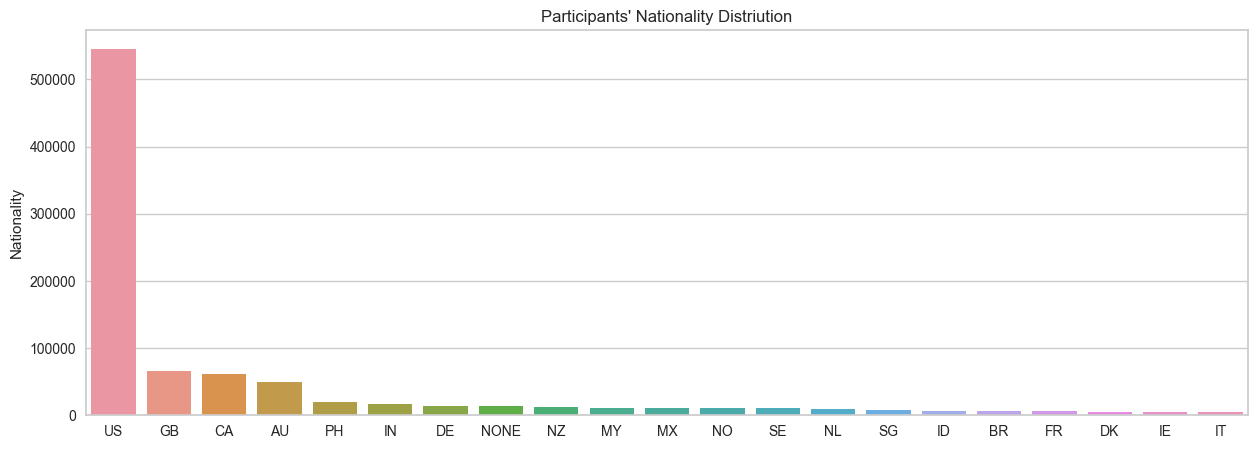

In [138]:
# Participants' Nationality Distriution

countries = pd.DataFrame(data_df['country'].value_counts())
countries_5000 = countries[countries['country'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x=countries_5000.index, y='country')
plt.title('Participants\' Nationality Distriution')
plt.ylabel('Participants');
plt.ylabel('Nationality');

In [139]:
print('Number of responses after handling missing values: ', len(data_df))

Number of responses after handling missing values:  1013481


In [140]:
# funtion to visualize the answer distribution for the questions

def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 6):
        plt.subplot(10,5,i)
        plt.hist(data_df[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Openness Personality



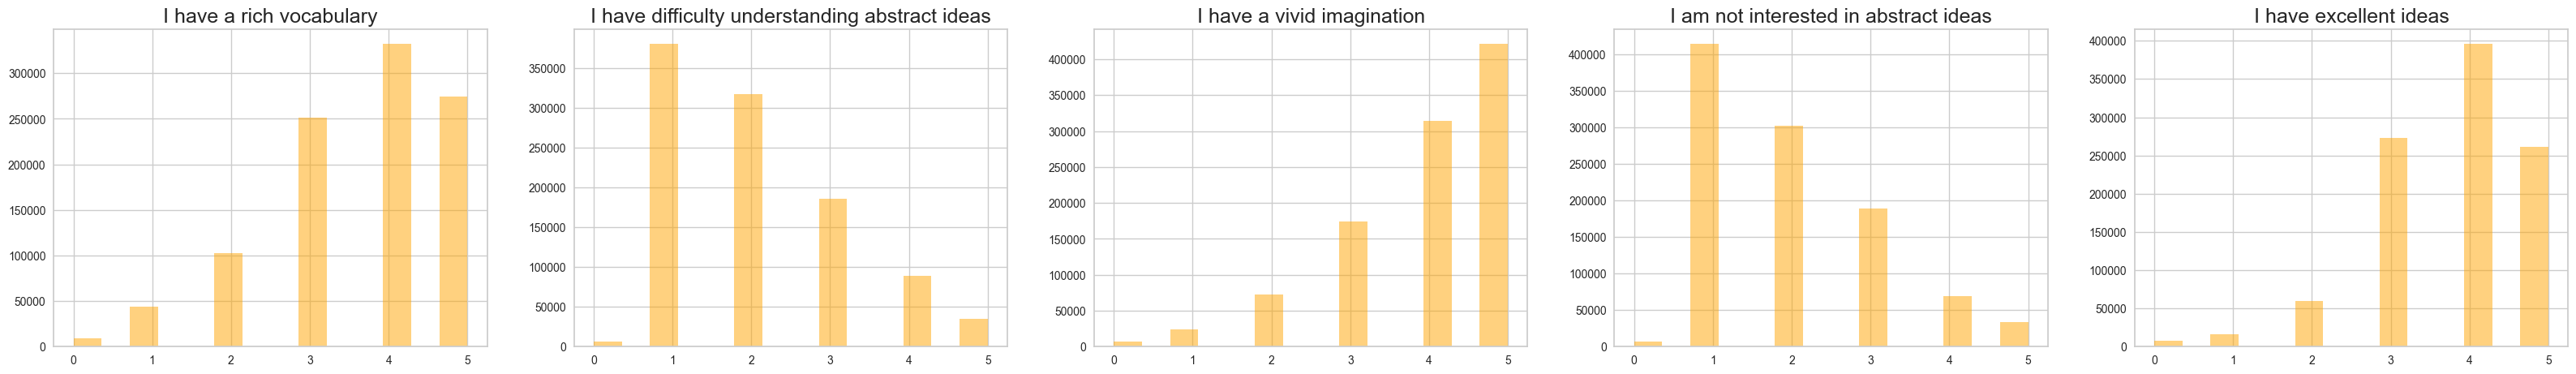

In [141]:
# OPENNESS

print('Q&As Related to Openness Personality\n')
vis_questions(OPN, opn_questions, 'orange')

Q&As Related to Conscientious Personality



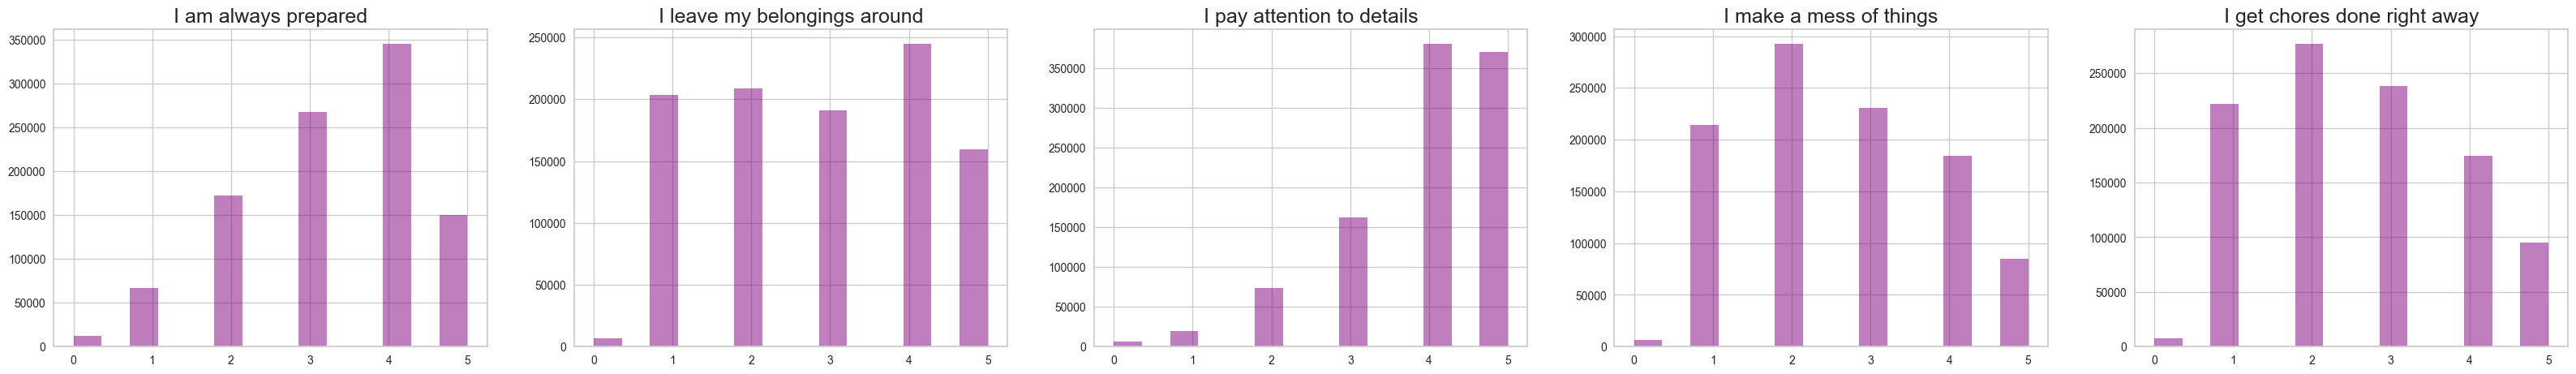

In [142]:
# CONSCIENTIOUS

print('Q&As Related to Conscientious Personality\n')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Extroversion Personality



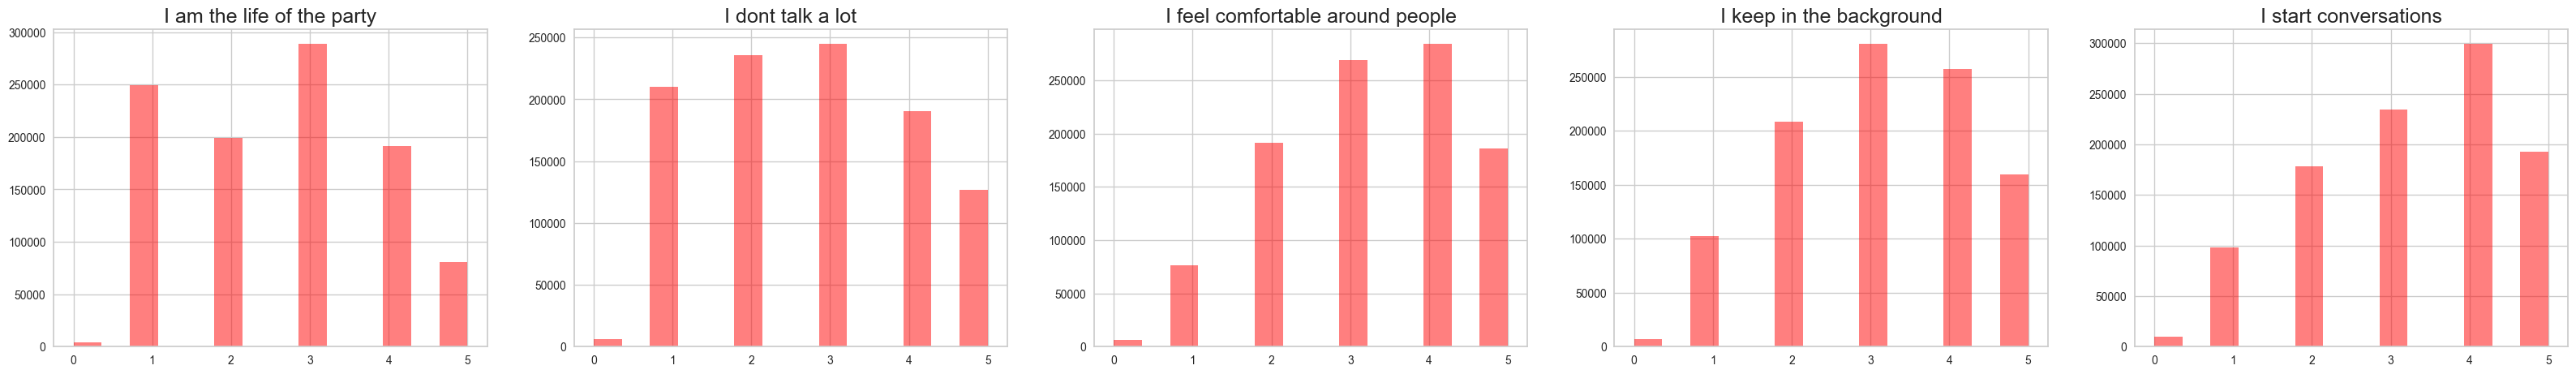

In [143]:
# EXTROVERSION

print('Q&As Related to Extroversion Personality\n')
vis_questions(EXT, ext_questions, 'red')

Q&As Related to Agreeable Personality



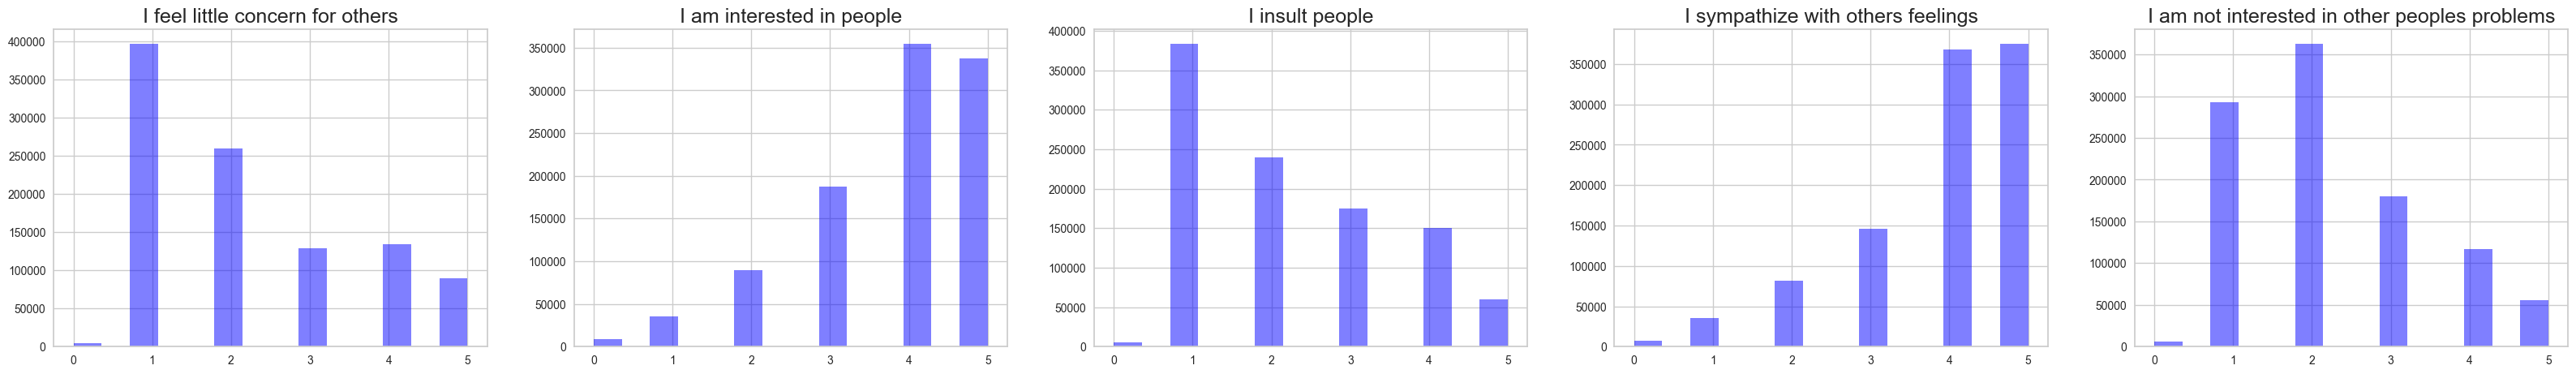

In [144]:
# AGREEABLENESS

print('Q&As Related to Agreeable Personality\n')
vis_questions(AGR, agr_questions, 'blue')

Q&As Related to Neuroticism Personality



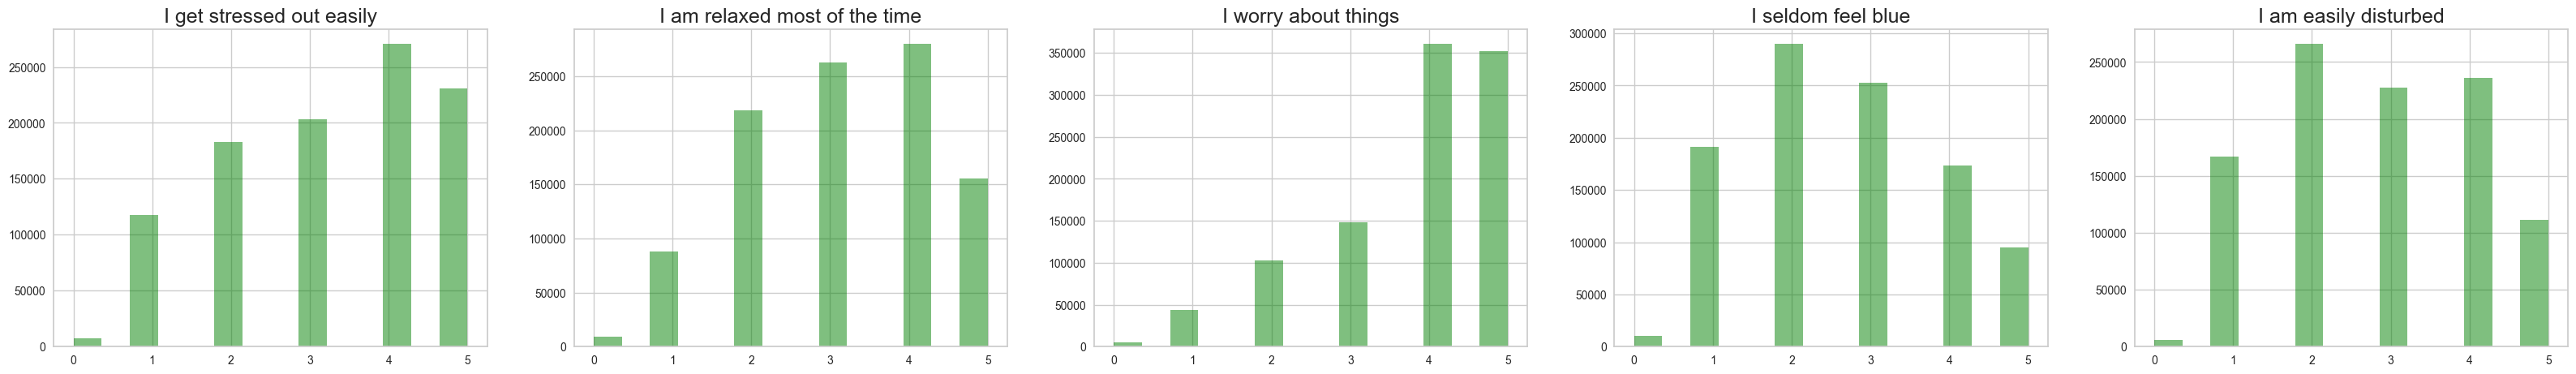

In [145]:
# NEUROTICISM

print('Q&As Related to Neuroticism Personality\n')
vis_questions(EST, est_questions, 'green')

# K-means Clustering

## Elbow Visualization

In [146]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000
from sklearn.preprocessing import MinMaxScaler

df = data_df.drop(['country'], axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

c:\Users\malee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\malee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\malee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\malee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

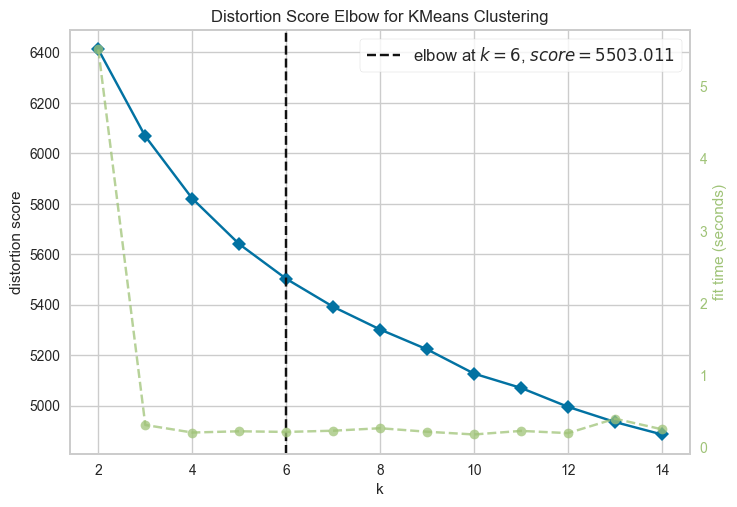

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [147]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

**As you can see 6 clusters looks optimum for the data set.**

In [148]:
# creating the K-means Cluster Model
from sklearn.cluster import KMeans

df_model = data_df.drop('country', axis=1)

# define 6 clusters and fit the model
kmeans = KMeans(n_clusters=6)
k_fit = kmeans.fit(df_model)

c:\Users\malee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [149]:
# predicting the clusters for the dataset

pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['cluster'] = predictions
df_model.head(25)

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN2,OPN3,OPN4,OPN5,cluster
0,4.0,1.0,5.0,2.0,5.0,...,1.0,4.0,1.0,4.0,2
1,3.0,5.0,3.0,4.0,3.0,...,2.0,4.0,2.0,3.0,0
2,2.0,3.0,4.0,4.0,3.0,...,1.0,2.0,1.0,4.0,0
3,2.0,2.0,2.0,3.0,4.0,...,2.0,5.0,2.0,3.0,3
4,3.0,3.0,3.0,3.0,5.0,...,1.0,5.0,1.0,5.0,2
5,3.0,3.0,4.0,2.0,4.0,...,1.0,5.0,1.0,3.0,2
6,4.0,3.0,4.0,3.0,3.0,...,2.0,4.0,3.0,4.0,0
7,3.0,1.0,5.0,2.0,5.0,...,1.0,3.0,1.0,5.0,2
8,2.0,2.0,3.0,3.0,4.0,...,1.0,5.0,1.0,4.0,0
9,1.0,5.0,3.0,5.0,2.0,...,1.0,3.0,1.0,3.0,5


Analysing the Model and Predictions

In [150]:
# get the number of individuals for each cluster

df_model.cluster.value_counts()

3    194547
2    184864
0    175670
1    165969
4    152641
5    139790
Name: cluster, dtype: int64

In [151]:
# get the average answer to the each question group for each cluster.

pd.options.display.max_columns = 75
df_model.groupby('cluster').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EST1,EST2,EST3,EST4,EST5,AGR1,AGR2,AGR3,AGR4,AGR5,CSN1,CSN2,CSN3,CSN4,CSN5,OPN1,OPN2,OPN3,OPN4,OPN5
cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.999562,3.378317,2.945113,3.732823,2.879763,3.770422,2.810787,4.331246,2.424580,2.925747,1.662862,3.928423,1.641584,4.369175,1.927745,3.910218,2.043086,4.372944,1.957511,3.297285,3.753208,1.955786,4.028610,1.880822,3.788945
1,1.669577,3.749610,2.109279,4.176678,2.138550,4.272045,2.408853,4.539637,2.046533,3.489224,2.363815,3.349752,2.592852,3.840464,2.530051,2.659545,3.630238,3.800294,3.653953,1.860739,3.625490,2.245678,4.152703,1.989341,3.452747
2,3.426194,1.992724,4.347510,2.253246,4.242308,2.176238,3.911448,3.035556,3.354855,2.029276,1.835695,4.435737,1.749854,4.265265,1.840429,3.850209,2.340623,4.271767,1.726485,3.331768,3.914256,1.697329,4.070306,1.762550,4.175670
3,3.434563,1.802248,3.865076,2.411746,4.094918,3.668640,3.019116,4.200008,2.381229,3.072923,1.753067,4.420371,2.564912,4.310891,1.811382,2.832292,3.942939,3.826803,3.307468,1.952551,3.966764,1.805888,4.378233,1.681553,4.035153
4,3.093894,2.546262,3.527683,2.955071,3.545961,3.607517,3.129978,3.996508,2.884716,3.372678,3.230796,3.678062,2.550029,3.710320,2.609541,3.289745,2.760693,3.717271,2.749189,2.939610,2.801443,3.170760,3.445025,2.999633,3.407564
5,2.014572,3.483983,2.655126,3.556413,2.419129,2.090343,3.762515,2.830718,2.935138,2.150111,3.059790,2.827899,2.575220,2.732785,3.233014,3.213506,2.769869,3.779562,2.293340,2.351263,3.719193,1.706467,3.769783,1.827348,3.779047


In [152]:
# get the average answer to the each question group for each response

col_list = list(df_model)
ext = col_list[0:5]
est = col_list[5:10]
agr = col_list[10:15]
csn = col_list[15:20]
opn = col_list[20:25]

data = pd.DataFrame()
data['openness'] = df_model[opn].sum(axis=1)/5
data['conscientiousness'] = df_model[csn].sum(axis=1)/5
data['extraversion'] = df_model[ext].sum(axis=1)/5
data['agreeableness'] = df_model[agr].sum(axis=1)/5
data['neuroticism'] = df_model[est].sum(axis=1)/5
data['cluster'] = predictions
data.groupby('cluster').mean()

,openness,conscientiousness,extraversion,agreeableness,neuroticism
cluster,,,,,
0,3.081474,3.116209,2.987116,2.705958,3.252556
1,3.093192,3.120954,2.768739,2.935387,3.351258
2,3.124022,3.104171,3.252396,2.825396,2.901475
3,3.173518,3.172411,3.121710,2.972125,3.268383
4,3.164885,3.091302,3.133774,3.155750,3.398280
5,2.960368,2.881508,2.825844,2.885741,2.753765


         openness  conscientiousness  extraversion  agreeableness  neuroticism
cluster                                                                       
0        3.081474           3.116209      2.987116       2.705958     3.252556
1        3.093192           3.120954      2.768739       2.935387     3.351258
2        3.124022           3.104171      3.252396       2.825396     2.901475
3        3.173518           3.172411      3.121710       2.972125     3.268383
4        3.164885           3.091302      3.133774       3.155750     3.398280
5        2.960368           2.881508      2.825844       2.885741     2.753765


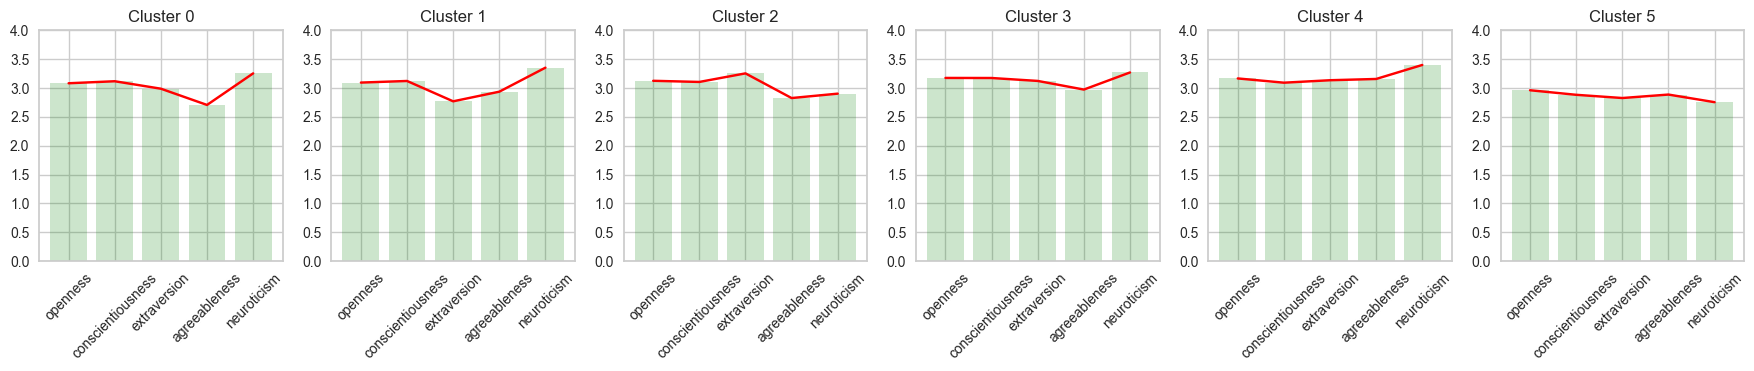

In [158]:
dataclusters = data.groupby('cluster').mean()
plt.figure(figsize=(22, 3))
for i in range(0, 6):  # as we have 6 clusters
    plt.subplot(1, 6, i + 1)
    plt.bar(dataclusters.columns, dataclusters.iloc[i, :], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[i, :], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0, 4)

print(dataclusters)


Visualizing the Clusters

In [154]:
# applying PCA to the data matrix to obtain the principal components - PCA is used for dimensionality reduction before applying k-means clustering
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = predictions
df_pca.head()

,PCA1,PCA2,cluster
0,-3.805313,-0.623585,2
1,1.439889,-2.491525,0
2,0.309490,-2.362485,0
3,0.539203,0.813371,3
4,-3.254717,-2.408617,2


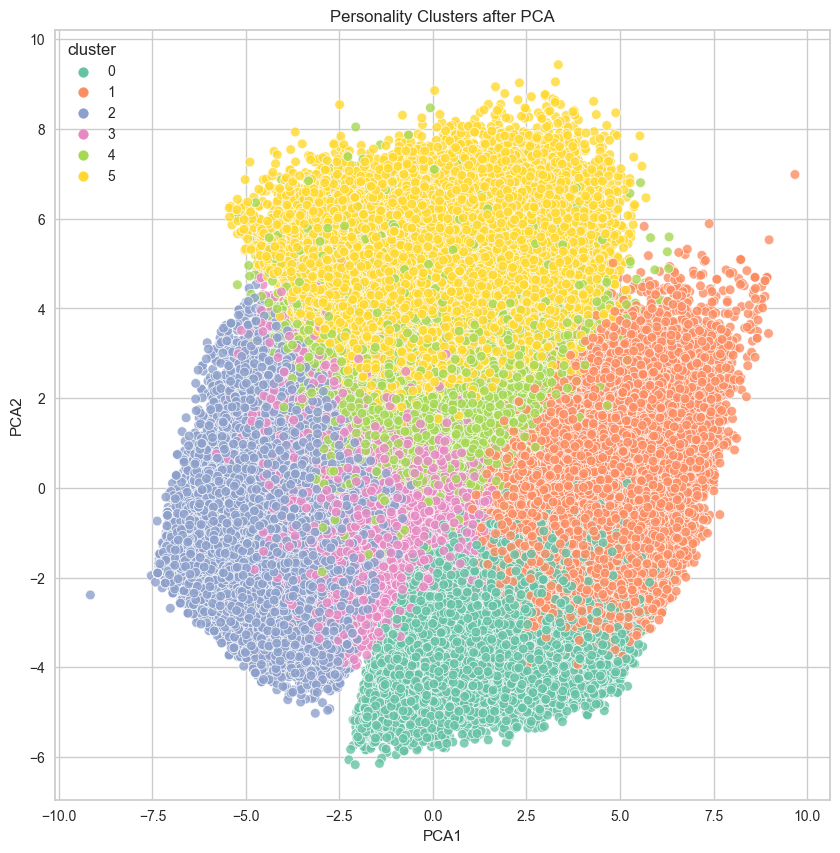

In [155]:
# visualize the five personality clusters after applying PCA

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

# Saving the model

In [156]:
import pickle
from sklearn.cluster import KMeans

# Save the model to a pickle file
with open('../../models/personality_prediction/kmeans_model.pkl', 'wb') as file:
    pickle.dump(k_fit, file)

print("K-means model saved successfully.")

K-means model saved successfully.


Testing the model

In [157]:
import pickle

# Load the model from the pickle file
model = pickle.load(open('../../models/personality_prediction/kmeans_model.pkl', 'rb'))
print(model.predict([[3,2,1,1,2,1,2,2,1,4,2,5,4,4,4,5,5,4,4,4,5,3,3,4,5]]))

[4]


c:\Users\malee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
